# Part 1 : Linear Programming 

# he Role of High-Dimensional Features in ML Models

Modern machine learning systems — especially those powering platforms at scale like Meta — often rely on models that incorporate hundreds or even thousands of input features. 

This high-dimensional representation can significantly enhance a model’s predictive accuracy, leading to better decision-making and measurable business gains. However, while the richness of features contributes to performance, it also introduces complexity that impacts downstream deployment.

# Deployment Constraints in Production Environments

When moving from experimentation to production, ML models must adhere to strict operational constraints. These include low latency demands, limited memory availability, and regulated CPU utilization. 

Models with excessive input features or overly complex architectures tend to consume more computational resources. This can slow down inference, increase energy costs, and in some cases, breach service-level agreements (SLAs), directly affecting user experience and system reliability.

# Balancing Accuracy and Efficiency

To maintain both model performance and deployability, ML engineers must carefully balance feature richness with computational efficiency. 

It’s not just about building accurate models — they must also be optimized for real-time, resource-constrained environments. Achieving this balance requires careful trade-offs in design and implementation.

# Strategies for Efficient Model Deployment

Several strategies are commonly used to simplify models without sacrificing too much performance:

Feature Selection: Removing redundant or low-importance features to reduce input dimensionality.

Model Pruning: Trimming unnecessary parts of neural networks to reduce size and computation.

Lightweight Architectures: Using models like decision trees, linear models, or efficient neural networks (e.g., MobileNet) tailored for speed.

Together, these techniques help ensure that ML models are not only accurate but also scalable and sustainable in production.

# Efficient Feature Selection: Striking the Balance Between Accuracy and Scalability

In machine learning at scale, it's critical to balance model performance with system efficiency. Few methods for constraining computation and latency are so powerful as input feature reduction.

Direct techniques like dropping features simply at random or exhaustive search over all possible combinations are too risky — sacrificing potentially model accuracy in the process — or infeasible computationally for high-dimensional data.

This highlights the need for a smarter, feature selection-by-objective approach. Such an approach should be capable of choosing the most relevant features while eliminating the less relevant features that contribute nothing useful to the model's predictive power.

In an ideal situation, it should be respectful of inference time and resource requirements in production as well. A good feature reduction pipeline can drastically improve system performance, enhance interpretability, and simplify model maintenance on a continuous basis without compromising on prediction quality.

# Leveraging Linear Programming for Scalable Feature Optimization

The article presents an innovative approach by framing the feature selection problem as a Linear Programming (LP) task. This formulation enables the selection of a feature subset that maximizes model utility while adhering to strict resource constraints like latency or memory usage. 

Unlike brute-force or greedy strategies, which can be slow or suboptimal, LP offers a scalable and efficient method that produces optimal or near-optimal results. By translating feature importance and cost into a mathematical model, this technique ensures that deployed machine learning systems remain both accurate and production-ready

# Resource-Efficient Feature Selection for Scalable ML Deployment

The LP-based feature selection strategy empowers production machine learning systems to retain high predictive performance while minimizing resource consumption. 

By evaluating each feature’s contribution to the model against its computational cost, this approach selects only those features that offer the best trade-off between accuracy and efficiency. 

This ensures that models remain lightweight and responsive — critical for large-scale deployments where even minor inefficiencies can escalate into substantial infrastructure costs.

The method’s scalability and awareness of real-world constraints make it ideal for optimizing ML systems in production environments without compromising performance.

#  Context of the Problem

In this scenario, a machine learning model is provided with a pool of candidate input features, each associated with two key attributes: a performance score and a resource cost. The performance score reflects the feature’s contribution to the model’s predictive accuracy, while the resource cost measures the computational burden it imposes, such as memory usage, latency, or CPU consumption.

Since the model must operate within a strict system budget — typically defined by real-time production constraints — it is not feasible to include all available features.

The challenge lies in selecting an optimal subset of features that maximizes the model’s effectiveness while ensuring the total resource cost remains within the allowed budget. 

This requires evaluating the trade-off between each feature's predictive value and its resource consumption. Features that provide high accuracy but at a prohibitive cost may need to be excluded in favor of more efficient alternatives.

The overall objective is to maintain strong model performance without compromising system efficiency or scalability. As a result, intelligent feature selection becomes a critical optimization step in deploying machine learning models in resource-constrained environments.

## Binary Integer Linear Programming (BILP) Formulation


## Decision Variables

Let:

- $x_{f,i} = 1$ if feature $i$ is selected in **uncompressed** form, else 0  
- $x_{c,i} = 1$ if feature $i$ is selected in **compressed** form, else 0

Define the decision vectors:

$$
\mathbf{x_f} = [x_{f,1}, x_{f,2}, \dots, x_{f,n}] \in \{0,1\}^n
$$

$$
\mathbf{x_c} = [x_{c,1}, x_{c,2}, \dots, x_{c,n}] \in \{0,1\}^n
$$


##  Objective Function

Our objective is to **maximize total model gain**:

$$
\max_{\mathbf{x_f}, \mathbf{x_c}} \sum_{i=1}^{n} \left( g_{f,i} \cdot x_{f,i} + g_{c,i} \cdot x_{c,i} \right)
$$

Where:
- $g_{f,i}$ is the gain of feature $i$ in uncompressed form  
- $g_{c,i}$ is the gain of feature $i$ in compressed form


##  LP Relaxation for Scalability

##  Constraints

###  Feature Uniqueness Constraint

Each feature can only be selected in one form (uncompressed or compressed):

$$
x_{f,i} + x_{c,i} \leq 1 \quad \text{for all } i
$$

Or in matrix form:

$$
\begin{bmatrix}
I_n & I_n
\end{bmatrix}
\begin{bmatrix}
\mathbf{x_f} \\
\mathbf{x_c}
\end{bmatrix}
\leq \mathbf{1}_n
$$



###  Service A (e.g., Memory) Capacity Constraint:

$$
\mathbf{s_{Af}}^\top \mathbf{x_f} + \mathbf{s_{Ac}}^\top \mathbf{x_c} \leq C_A
$$



###  Service B (e.g., CPU) Capacity Constraint:

$$
\mathbf{s_{Bf}}^\top \mathbf{x_f} + \mathbf{s_{Bc}}^\top \mathbf{x_c} \leq C_B
$$

##  Key Parameters

| Symbol              | Meaning                                   | Shape              |
|---------------------|--------------------------------------------|---------------------|
| $\mathbf{x_f}$      | Binary vector for uncompressed features    | $\{0,1\}^n$         |
| $\mathbf{x_c}$      | Binary vector for compressed features      | $\{0,1\}^n$         |
| $\mathbf{g_f}$      | Gains of uncompressed features             | $\mathbb{R}^n$      |
| $\mathbf{g_c}$      | Gains of compressed features               | $\mathbb{R}^n$      |
| $\mathbf{s_{Af}}$   | Service A costs for full features          | $\mathbb{R}^n$      |
| $\mathbf{s_{Ac}}$   | Service A costs for compressed features    | $\mathbb{R}^n$      |
| $\mathbf{s_{Bf}}$   | Service B costs for full features          | $\mathbb{R}^n$      |
| $\mathbf{s_{Bc}}$   | Service B costs for compressed features    | $\mathbb{R}^n$      |
| $C_A, C_B$          | Total capacities of Service A and B        | Scalars             |


##  Sensitivity Analysis

###  Shadow Prices

The shadow price (dual value) of Service A tells us the marginal gain if we increase capacity:

$$
\lambda_A = \frac{\Delta \text{Gain}}{\Delta C_A}
$$

If $\lambda_A = 5$, then adding 1 more unit of capacity to Service A increases total gain by 5 units.



###  Compression Trade-off

Compression is worth it when the **normalized gain** exceeds the **normalized cost**.

For feature $i$, compression is beneficial when:

$$
\frac{g_{c,i}}{g_{f,i}} > \frac{s_{Ac,i} + \alpha s_{Bc,i}}{s_{Af,i}}
$$

Where $\alpha$ is the relative cost trade-off between Services A and B.


## Extensions

###  Multi-Service Generalization

If we have $k$ infrastructure services, we can generalize the constraints as:

$$
\sum_{j=1}^{k} \mathbf{w_j}^\top 
\begin{bmatrix}
\mathbf{x_f} \\
\mathbf{x_c}
\end{bmatrix}
\leq \mathbf{C}
$$

Where $\mathbf{w_j}$ is the resource cost vector for service $j$, and $\mathbf{C}$ is the vector of capacities.



### Regularized Objective (Sparsity)

To limit the number of selected features, we can penalize using too many by adding L1 regularization:

$$
\max \left( \mathbf{g_f}^\top \mathbf{x_f} + \mathbf{g_c}^\top \mathbf{x_c} - \gamma \|\mathbf{x_f} + \mathbf{x_c}\|_1 \right)
$$

Where $\gamma$ controls the trade-off between model gain and simplicity.


# 2 Farmer's Optimization Problem

A farmer has 500 acres of land to allocate among **wheat**, **corn**, and **sugar beets**.  
The goal is to **maximize profit**, considering:

- **Yield per acre**
- **Planting costs**
- **Selling prices (with price thresholds for sugar beets)**
- **Minimum feed demand**
- **Backup purchase costs**

We define decision variables for how many acres to plant, how much to sell, and how much to purchase for feed.


##  Decision Variables

Let the following variables represent the farmer’s decisions:

- $x_1$: Acres used for **wheat**
- $x_2$: Acres used for **corn**
- $x_3$: Acres used for **sugar beets**

- $p_1$: Tons of **wheat sold**
- $p_2$: Tons of **corn sold**
- $p_3$: Tons of sugar beets sold at **£36** (first 6000 T)
- $p_4$: Tons of sugar beets sold at **£10** (beyond 6000 T)

- $y_1$: Tons of **wheat purchased** to meet feed demand
- $y_2$: Tons of **corn purchased** to meet feed demand


## Objective Function: Maximize Profit

Profit = Revenue – Planting Cost – Feed Purchase Cost

### Revenue:
- £170 × $p_1$ (wheat sold)
- £150 × $p_2$ (corn sold)
- £36 × $p_3$ (sugar beets sold ≤ 6000 T)
- £10 × $p_4$ (sugar beets sold > 6000 T)

### Planting Cost:
- £150 × $x_1$
- £230 × $x_2$
- £260 × $x_3$

### Backup (Feed Purchase) Cost:
- £238 × $y_1$ (wheat purchased)
- £210 × $y_2$ (corn purchased)

Thus, the profit function becomes:

$$
\text{Maximize: } 
170p_1 + 150p_2 + 36p_3 + 10p_4 - 150x_1 - 230x_2 - 260x_3 - 238y_1 - 210y_2
$$


##  Constraints

###  Land Availability
Total land used cannot exceed 500 acres:

$$
x_1 + x_2 + x_3 \leq 500
$$



###  Yield Relationships

Yields are:
- Wheat: 2.5 T/acre
- Corn: 3.0 T/acre
- Sugar beets: 20 T/acre

So, total crop output:

- Wheat: $2.5x_1 = p_1 + y_1$
- Corn: $3x_2 = p_2 + y_2$
- Sugar beets: $20x_3 = p_3 + p_4$ (since all beets are sold)



###  Feed Demand (minimum required for livestock):

- Wheat: $p_1 + y_1 \geq 200$
- Corn: $p_2 + y_2 \geq 240$



###  Sugar Beet Selling Limits:

- $p_3 \leq 6000$ (limited to 6000 T at £36)
- $p_4 \geq 0$ (extra can be sold at £10)



###  Non-negativity:
All decision variables must be ≥ 0:

$$
x_1, x_2, x_3, p_1, p_2, p_3, p_4, y_1, y_2 \geq 0
$$


##  Summary of Data

| Parameter              | Wheat | Corn | Sugar Beets |
|------------------------|-------|------|--------------|
| Yield (T/acre)         | 2.5   | 3    | 20           |
| Feed demand (T)        | 200   | 240  | –            |
| Planting cost (£/acre) | 150   | 230  | 260          |
| Selling price (£/T)    | 170   | 150  | £36 ≤ 6000 T |
| Backup price (£/T)     | 238   | 210  | –            |


# Solution Using Pulp 

# PART 1: Import Libraries and Set Up the Model

In [11]:
from pulp import LpProblem, LpMaximize, LpVariable, value
import matplotlib.pyplot as plt
import warnings

# Suppress any warning messages for cleaner output
warnings.filterwarnings("ignore")

# Initialize the linear programming model to maximize profit
model = LpProblem("Farmer_Crop_Allocation", LpMaximize)

# PART 2: Define Decision Variables

In [12]:
# Acres of land to allocate (non-negative continuous variables)
wheat_acres = LpVariable("Wheat_Acres", lowBound=0)
corn_acres = LpVariable("Corn_Acres", lowBound=0)
beet_acres = LpVariable("Beet_Acres", lowBound=0)

# Crop sales (tons)
wheat_sold = LpVariable("Wheat_Sold", lowBound=0)
corn_sold = LpVariable("Corn_Sold", lowBound=0)
beets_sold_36 = LpVariable("Beets_Sold_36", lowBound=0, upBound=6000)  # capped at 6000T
beets_sold_10 = LpVariable("Beets_Sold_10", lowBound=0)                # surplus sold at £10

# Backup feed purchases
wheat_purchased = LpVariable("Wheat_Purchased", lowBound=0)
corn_purchased = LpVariable("Corn_Purchased", lowBound=0)

# PART 3: Add Constraints to the Mode

In [13]:
# Total land cannot exceed 500 acres
model += wheat_acres + corn_acres + beet_acres <= 500, "Total_Land_Limit"

# Yield balances (production = sales + purchase)
model += 2.5 * wheat_acres == wheat_sold + wheat_purchased, "Wheat_Yield_Balance"
model += 3.0 * corn_acres == corn_sold + corn_purchased, "Corn_Yield_Balance"
model += 20.0 * beet_acres == beets_sold_36 + beets_sold_10, "Beets_Yield_Balance"

# Minimum demand constraints for feed use
model += wheat_sold + wheat_purchased >= 200, "Wheat_Demand"
model += corn_sold + corn_purchased >= 240, "Corn_Demand"

# PART 4: Define the Objective Function (Maximize Profit)

In [14]:
# Revenue from crop sales
sales_revenue = (
    170 * wheat_sold +
    150 * corn_sold +
    36 * beets_sold_36 +
    10 * beets_sold_10
)

# Cost of planting crops
planting_cost = (
    150 * wheat_acres +
    230 * corn_acres +
    260 * beet_acres
)

# Cost of purchasing backup feed
purchase_cost = (
    238 * wheat_purchased +
    210 * corn_purchased
)

# Objective: maximize profit = sales revenue - planting cost - backup purchase cost
model += sales_revenue - planting_cost - purchase_cost, "Total_Profit"

# PART 5: Solve the Model and Display Results

In [16]:
# Solve the optimization problem
model.solve()

# Display the solution status and problem name
print(f"Status: {model.status}, Problem Name: {model.name}")

# Display allocated land
print("\n--- Land Allocation (Acres) ---")
print(f"Wheat: {wheat_acres.varValue:.2f}")
print(f"Corn : {corn_acres.varValue:.2f}")
print(f"Beets: {beet_acres.varValue:.2f}")

# Display sales and purchases
print("\n--- Crop Sales (Tons) ---")
print(f"Wheat sold         : {wheat_sold.varValue:.2f}")
print(f"Corn sold          : {corn_sold.varValue:.2f}")
print(f"Beets sold at £36  : {beets_sold_36.varValue:.2f}")
print(f"Beets sold at £10  : {beets_sold_10.varValue:.2f}")

print("\n--- Feed Purchased (Tons) ---")
print(f"Wheat purchased    : {wheat_purchased.varValue:.2f}")
print(f"Corn purchased     : {corn_purchased.varValue:.2f}")

# Total Profit
print(f"\n>>> Total Profit: £{value(model.objective):,.2f}")

Status: 1, Problem Name: Farmer_Crop_Allocation

--- Land Allocation (Acres) ---
Wheat: 120.00
Corn : 80.00
Beets: 300.00

--- Crop Sales (Tons) ---
Wheat sold         : 300.00
Corn sold          : 240.00
Beets sold at £36  : 6000.00
Beets sold at £10  : 0.00

--- Feed Purchased (Tons) ---
Wheat purchased    : 0.00
Corn purchased     : 0.00

>>> Total Profit: £188,600.00


# Visualizations

# Prerequisite: Collect Results for Plotting

In [17]:
# Collect all values from the solved model for plotting
land_data = {
    "Wheat": wheat_acres.varValue,
    "Corn": corn_acres.varValue,
    "Beets": beet_acres.varValue
}

sales_data = {
    "Wheat Sold": wheat_sold.varValue,
    "Corn Sold": corn_sold.varValue,
    "Beets Sold (£36)": beets_sold_36.varValue,
    "Beets Sold (£10)": beets_sold_10.varValue
}

purchase_data = {
    "Wheat Purchased": wheat_purchased.varValue,
    "Corn Purchased": corn_purchased.varValue
}

# 1. Bar Plot – Land Allocation (Acres)

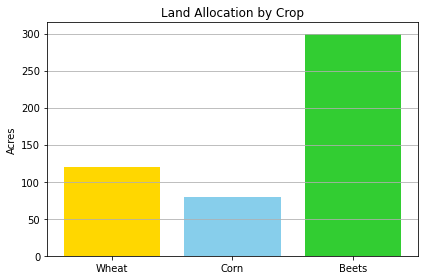

In [18]:
plt.figure(figsize=(6, 4))
plt.bar(land_data.keys(), land_data.values(), color=["gold", "skyblue", "limegreen"])
plt.title("Land Allocation by Crop")
plt.ylabel("Acres")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Bar Plot – Crop Sales (Tons)

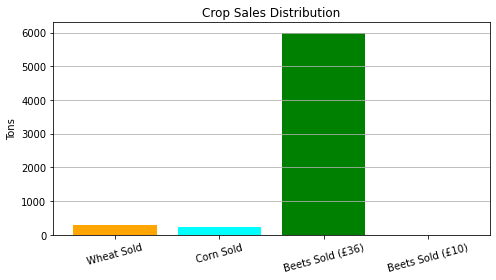

In [19]:
plt.figure(figsize=(7, 4))
plt.bar(sales_data.keys(), sales_data.values(), color=["orange", "cyan", "green", "darkgreen"])
plt.title("Crop Sales Distribution")
plt.ylabel("Tons")
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 3. Pie Chart – Land Use Percentage

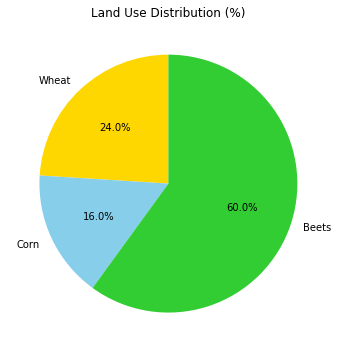

In [20]:
plt.figure(figsize=(5, 5))
plt.pie(land_data.values(), labels=land_data.keys(), autopct='%1.1f%%', startangle=90, colors=["gold", "skyblue", "limegreen"])
plt.title("Land Use Distribution (%)")
plt.tight_layout()
plt.show()

 # 4. Pie Chart – Revenue Share by Crop

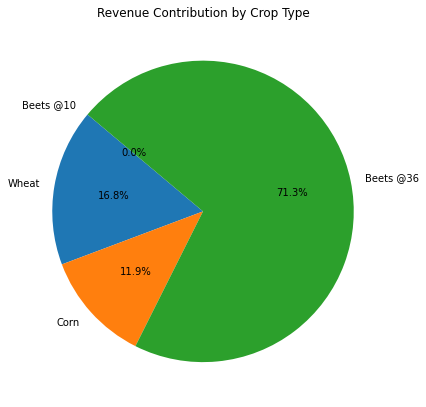

In [21]:
revenue_data = {
    "Wheat": 170 * wheat_sold.varValue,
    "Corn": 150 * corn_sold.varValue,
    "Beets @36": 36 * beets_sold_36.varValue,
    "Beets @10": 10 * beets_sold_10.varValue
}

plt.figure(figsize=(6, 6))
plt.pie(revenue_data.values(), labels=revenue_data.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Revenue Contribution by Crop Type")
plt.tight_layout()
plt.show()

# 5. Combined Plot – Profit Breakdown

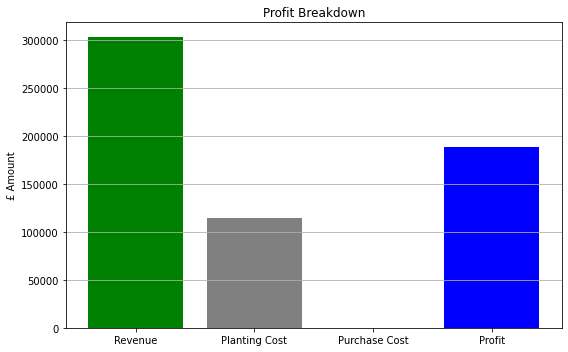

In [23]:
import numpy as np

categories = ["Revenue", "Planting Cost", "Purchase Cost", "Profit"]
revenue_total = sum(revenue_data.values())
planting_total = (
    150 * wheat_acres.varValue +
    230 * corn_acres.varValue +
    260 * beet_acres.varValue
)
purchase_total = (
    238 * wheat_purchased.varValue +
    210 * corn_purchased.varValue
)
profit = revenue_total - planting_total - purchase_total

values = [revenue_total, planting_total, purchase_total, profit]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=["green", "gray", "tomato", "blue"])
plt.title("Profit Breakdown")
plt.ylabel("£ Amount")
plt.grid(axis='y')
plt.tight_layout()
plt.show()